# See comparison
If you have tested on $\nu_{1}: 1000, 500, 100$ and save the corresponding results, you can run the following codes to see the comparision of error of different parameter configuration.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import json
import os

In [8]:
config_file = "config_duffing.json"
with open(config_file, "r") as f:
    config = json.load(f)

data_path = config["data_settings"]["data_path"]
figures_path = config["data_settings"]["figures_path"]

In [15]:
n_traj_per_param_list = [1000, 500, 100]

train_pk_mean = []
train_edmd_dl_mean = []
train_edmd_rbf_mean = []
train_optdmd_mean = []
test_pk_mean = []
test_edmd_dl_mean = []
test_edmd_rbf_mean = []
test_optdmd_mean = []


for n_traj_per_param in n_traj_per_param_list:
    n_param = int(10000 / n_traj_per_param)
    dict_mean = np.load(
        os.path.join(
            data_path,
            "error_dict_n_traj_per_param_"
            + str(n_traj_per_param)
            + "_n_param_"
            + str(n_param)
            + "_mean.npy",
        ),
        allow_pickle=True,
    )
    dict_std = np.load(
        os.path.join(
            data_path,
            "error_dict_n_traj_per_param_"
            + str(n_traj_per_param)
            + "_n_param_"
            + str(n_param)
            + "_std.npy",
        ),
        allow_pickle=True,
    )

    train_ratio_pk_list_mean = dict_mean[()]["pk_train"]
    train_pk_mean.append(np.mean(train_ratio_pk_list_mean))

    train_ratio_edmd_dl_list_mean = dict_mean[()]["edmd_dl_train"]
    train_edmd_dl_mean.append(np.mean(train_ratio_edmd_dl_list_mean))

    train_ratio_edmd_rbf_list_mean = dict_mean[()]["edmd_rbf_train"]
    train_edmd_rbf_mean.append(np.mean(train_ratio_edmd_rbf_list_mean))

    train_ratio_optdmd_list_mean = dict_mean[()]["optdmd_train"]
    train_optdmd_mean.append(np.mean(train_ratio_optdmd_list_mean))

    test_ratio_pk_list_mean = dict_mean[()]["pk_test"]
    test_pk_mean.append(np.mean(test_ratio_pk_list_mean))

    test_ratio_edmd_dl_list_mean = dict_mean[()]["edmd_dl_test"]
    test_edmd_dl_mean.append(np.mean(test_ratio_edmd_dl_list_mean))

    test_ratio_edmd_rbf_list_mean = dict_mean[()]["edmd_rbf_test"]
    test_edmd_rbf_mean.append(np.mean(test_ratio_edmd_rbf_list_mean))

    test_ratio_optdmd_list_mean = dict_mean[()]["optdmd_test"]
    test_optdmd_mean.append(np.mean(test_ratio_optdmd_list_mean))


In [21]:
def plot_evaluate_duffing(nu, mean, dict_plot):
    plt.plot(
        nu,
        mean,
        label=dict_plot["label"],
        marker=dict_plot["marker"],
        markersize=dict_plot["markersize"],
        color=dict_plot["color"],
        linestyle=dict_plot["linestyle"],
        linewidth=dict_plot["linewidth"],
        alpha=0.7
    )

In [22]:
train_pk_mean = np.asarray(train_pk_mean)
train_edmd_dl_mean = np.asarray(train_edmd_dl_mean)
train_edmd_rbf_mean = np.asarray(train_edmd_rbf_mean)
train_optdmd_mean = np.asarray(train_optdmd_mean)

test_pk_mean = np.asarray(test_pk_mean)
test_edmd_dl_mean = np.asarray(test_edmd_dl_mean)
test_edmd_rbf_mean = np.asarray(test_edmd_rbf_mean)
test_optdmd_mean = np.asarray(test_optdmd_mean)

label_font = 24
ticks_font = 18
legend_font = 22

In [23]:
nu = n_traj_per_param_list
nu_xticks = ["(1000,10)", "(500,20)", "(100,100)"]

pk_linestyle = "dashdot"
edmd_dl_linestyle = "dotted"
edmd_rbf_linestyle = "solid"
optdmd_linestyle='dashed'

pk_curve = "steelblue"
edmd_dl_curve = "darkorange"
edmd_rbf_curve = "palevioletred"
optdmd_curve = "purple"

dict_plot_pk_train = {
    "label": "Ours(train)",
    "marker": "*",
    "markersize": 10,
    "color": pk_curve,
    "linestyle": '--',
    "linewidth": 3,
}
dict_plot_pk_test = {
    "label": "Ours(test)",
    "marker": "*",
    "markersize": 10,
    "color": pk_curve,
    "linestyle": '-',
    "linewidth": 3,
}



dict_plot_edmd_dl_train = {
    "label": "M1-NN(train)",
    "marker": "o",
    "markersize": 10,
    "color": edmd_dl_curve,
    "linestyle": "--",
    "linewidth": 3,
}
dict_plot_edmd_dl_test = {
    "label": "M1-NN(test)",
    "marker": "o",
    "markersize": 10,
    "color": edmd_dl_curve,
    "linestyle": "-",
    "linewidth": 3,
}

dict_plot_edmd_rbf_train = {
    "label": "M1-RBF(train)",
    "marker": "s",
    "markersize": 10,
    "color": edmd_rbf_curve,
    "linestyle": "--",
    "linewidth": 3,
}

dict_plot_edmd_rbf_test = {
    "label": "M1-RBF(test)",
    "marker": "s",
    "markersize": 10,
    "color": edmd_rbf_curve,
    "linestyle": "-",
    "linewidth": 3,
}

dict_plot_optdmd_train = {
    "label": "M0(train)",
    "marker": "^",
    "markersize": 10,
    "color": optdmd_curve,
    "linestyle": "--",
    "linewidth": 3,
}

dict_plot_optdmd_test = {
    "label": "M0(test)",
    "marker": "^",
    "markersize": 10,
    "color": optdmd_curve,
    "linestyle": "-",
    "linewidth": 3,
}


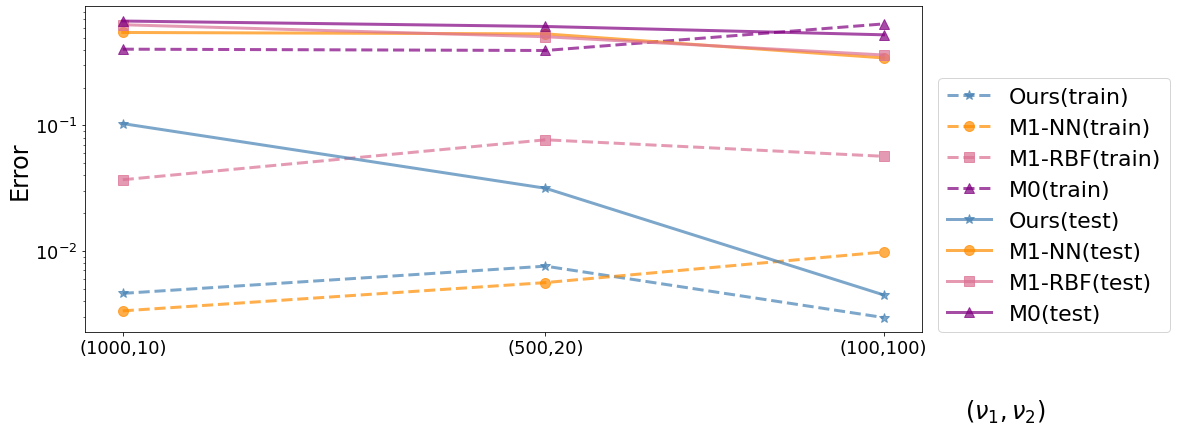

In [26]:
plt.figure(figsize=(15, 6))
plot_evaluate_duffing(nu, train_pk_mean, dict_plot_pk_train)
plot_evaluate_duffing(nu, train_edmd_dl_mean, dict_plot_edmd_dl_train)
plot_evaluate_duffing(nu, train_edmd_rbf_mean, dict_plot_edmd_rbf_train)
plot_evaluate_duffing(nu, train_optdmd_mean, dict_plot_optdmd_train)

plot_evaluate_duffing(nu, test_pk_mean, dict_plot_pk_test)
plot_evaluate_duffing(nu, test_edmd_dl_mean, dict_plot_edmd_dl_test)
plot_evaluate_duffing(nu, test_edmd_rbf_mean, dict_plot_edmd_rbf_test)
plot_evaluate_duffing(nu, test_optdmd_mean, dict_plot_optdmd_test)

plt.xlabel(r"$(\nu_{1}, \nu_{2})$", labelpad=20, fontsize=label_font)
plt.gca().xaxis.set_label_coords(1.1, -0.2)
plt.ylabel("Error", fontsize=label_font)
plt.xticks(nu, nu_xticks, fontsize=ticks_font)
plt.yticks(fontsize=ticks_font)
plt.gca().invert_xaxis()
plt.yscale("log")
plt.legend(fontsize=legend_font, loc=(1.02, 0.0))

# plt.savefig(os.path.join(figures_path, 'duffing_comparison.png'), dpi=200, bbox_inches='tight')
# plt.savefig(os.path.join(figures_path, 'duffing_comparison.pdf'), dpi=200, bbox_inches='tight')
